# Análisis Exploratorio de Datos (EDA)

## Importación de librerías y carga de datos

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('../data/covid_bucaramanga.csv')


## Verificar si hay valores vacíos y nulos dentro del dataset

Antes de analizar los datos, es importante revisar si existen valores nulos o vacíos en el dataset, ya que pueden afectar el análisis posterior. Además, observaremos los tipos de datos de cada columna para asegurarnos de que sean los adecuados para el análisis.

A continuación, se muestra una vista previa del DataFrame, junto con el conteo de valores nulos y el tipo de dato de cada columna.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141493 entries, 0 to 141492
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   fec_not              141493 non-null  object
 1   semana               141493 non-null  int64 
 2   año                  141493 non-null  int64 
 3   edad_                141493 non-null  int64 
 4   uni_med_             141493 non-null  int64 
 5   unidedad             141493 non-null  int64 
 6   Grupo_etario         141493 non-null  object
 7   Ciclo_de_vida        141493 non-null  object
 8   nombre_nacionalidad  141493 non-null  object
 9   sexo_                141493 non-null  object
 10  bar_ver_             141493 non-null  object
 11  COMUNA               141493 non-null  object
 12  tip_ss_              141493 non-null  object
 13  NOMBRE EPS           141493 non-null  object
 14  serv_hosp            141493 non-null  int64 
 15  desc_serv_hosp       141493 non-nu

## Transformar Datos (Cambiar a minúsculas los nombres de las columnas y cambiar el formato de `fec_not` a fecha)

Para facilitar el análisis y evitar errores por diferencias en mayúsculas/minúsculas, convertimos todos los nombres de las columnas a minúsculas. Además, transformamos la columna `fec_not` al formato de fecha para poder realizar análisis temporales de manera adecuada.

In [11]:
df.columns = df.columns.str.lower()
df['fec_not'] = pd.to_datetime(df['fec_not'])
df.head(5)


,fec_not,semana,año,edad_,uni_med_,unidedad,grupo_etario,ciclo_de_vida,nombre_nacionalidad,sexo_,bar_ver_,comuna,tip_ss_,nombre eps,serv_hosp,desc_serv_hosp,orden
0,2022-01-19,3,2022,20,1,120,20 A 29,JOVENES,NO DISPONIBLE,F,MUTUALIDAD,03. SAN FRANCISCO,I,INDETERMINADO,4,RECUPERADO,1
1,2021-02-07,28,2021,21,1,121,20 A 29,JOVENES,NO DISPONIBLE,F,SAN FRANCISCO,03. SAN FRANCISCO,I,INDETERMINADO,4,RECUPERADO,2
2,2021-05-06,25,2021,19,1,119,15 A 19,JOVENES,NO DISPONIBLE,F,MUTIS,17. MUTIS,I,INDETERMINADO,4,RECUPERADO,3
3,2021-07-23,32,2021,21,1,121,20 A 29,JOVENES,NO DISPONIBLE,M,TRANSICION I,02. NORORIENTAL,I,INDETERMINADO,4,RECUPERADO,4
4,2022-10-21,43,2022,19,1,119,15 A 19,JOVENES,NO DISPONIBLE,F,NO DISPONIBLE,NO DISPONIBLE,I,INDETERMINADO,4,RECUPERADO,5


## Eliminar columnas irrelevantes

Identificamos que existe una columna en la que todos los valores son 'No Disponible'. Esta columna no aporta información útil para el análisis, por lo que se elimina para evitar ruido en los datos.

In [ ]:
#df = df.drop(columns='nombre_nacionalidad')
df.head(5)

,fec_not,semana,año,edad_,uni_med_,unidedad,grupo_etario,ciclo_de_vida,sexo_,bar_ver_,comuna,tip_ss_,nombre eps,serv_hosp,desc_serv_hosp,orden
0,2022-01-19,3,2022,20,1,120,20 A 29,JOVENES,F,MUTUALIDAD,03. SAN FRANCISCO,I,INDETERMINADO,4,RECUPERADO,1
1,2021-02-07,28,2021,21,1,121,20 A 29,JOVENES,F,SAN FRANCISCO,03. SAN FRANCISCO,I,INDETERMINADO,4,RECUPERADO,2
2,2021-05-06,25,2021,19,1,119,15 A 19,JOVENES,F,MUTIS,17. MUTIS,I,INDETERMINADO,4,RECUPERADO,3
3,2021-07-23,32,2021,21,1,121,20 A 29,JOVENES,M,TRANSICION I,02. NORORIENTAL,I,INDETERMINADO,4,RECUPERADO,4
4,2022-10-21,43,2022,19,1,119,15 A 19,JOVENES,F,NO DISPONIBLE,NO DISPONIBLE,I,INDETERMINADO,4,RECUPERADO,5


## Análisis Exploratorio de Datos (EDA)

En esta etapa se exploran y analizan las características principales del dataset mediante estadísticas descriptivas y visualizaciones. El objetivo es comprender la estructura de los datos, identificar patrones, tendencias, valores atípicos y posibles problemas de calidad que puedan influir en el

### Análisis de la variable `edad`

La variable `edad` representa la edad de cada caso reportado en el dataset. Analizar su distribución permite identificar los grupos etarios más afectados, detectar posibles valores atípicos y comprender mejor el comportamiento de la pandemia según la edad de los individuos. Esta información es clave para orientar estrategias de prevención y

### Tratamiento de outliers en la variable "edad"
Se detectaron 87 registros con valor `0` en la columna `edad`. 
De acuerdo con el cliente (Secretaría de Salud), estos registros no representan casos reales de recién nacidos, 
sino errores de digitación o valores faltantes.  

**Acción tomada:** Se reclasifican como "sin dato" para no distorsionar el análisis de la distribución etaria.

In [ ]:
# Aquí sobrescribimos el DataFrame original con una copia filtrada, eliminando los registros con edad 0
df = df[df['edad_'] > 0].copy()


,fec_not,semana,año,edad_,uni_med_,unidedad,grupo_etario,ciclo_de_vida,sexo_,bar_ver_,comuna,tip_ss_,nombre eps,serv_hosp,desc_serv_hosp,orden


Moda de Edad: 0    26
Name: edad_, dtype: int64


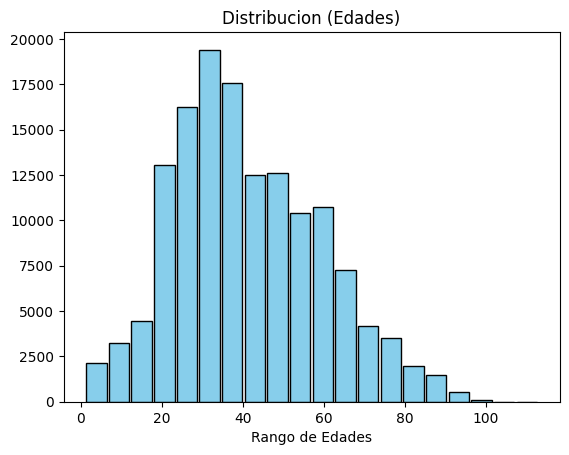

In [32]:
fig , ax = plt.subplots()
ax.hist(df['edad_'], bins=20, color='skyblue', edgecolor='black', rwidth=0.9)
ax.set_title('Distribucion (Edades)')
ax.set_xlabel('Rango de Edades')


# Sacar la edad que mas se repite.
df_moda = df['edad_'].mode()
print(f'Moda de Edad: {df_moda}')

En la grafica, se observa que la mayor cantidad de contagios se concentra en el grupo de edad entre **25 y 40 años**. Además, el valor más frecuente **(moda)** en la variable edad es **26**, lo que indica que esta edad específica presenta el mayor número de casos.

In [ ]:
# con esto confirmamos que ya no hay registros con la edad 0, y que el filtro si funciono.
df_edad = df[df['edad_'] == 0]


,fec_not,semana,año,edad_,uni_med_,unidedad,grupo_etario,ciclo_de_vida,sexo_,bar_ver_,comuna,tip_ss_,nombre eps,serv_hosp,desc_serv_hosp,orden


ciclo_de_vida
ADOLESCENCIA         5074
ADULTEZ             78382
INFANCIA             2565
JOVENES             29490
PERSONA MAYOR       23948
PRIMERA INFANCIA     1947
Name: ciclo_de_vida, dtype: int64